# seaborn介绍
+ 在matplotlib的基础上进行了更高级的API封装
+ 作图更加方便，画出来的图更加美观
+ 高度兼容numpy和pandas数据结构
+ 可视化变量之间的关系


# 安装seaborn
打开Anaconda命令行，运行
```bash
conda install seaborn
```
或者
```bash
pip install seaborn -i https://mirrors.aliyun.com/pypi/simple/
```

In [11]:
# 调整图像显示大小
import pylab
pylab.rcParams['figure.figsize'] = (15.0, 8.0)

In [12]:
import seaborn as sns


     subject  timepoint event    region    signal
0        s13         18  stim  parietal -0.017552
1         s5         14  stim  parietal -0.080883
2        s12         18  stim  parietal -0.081033
3        s11         18  stim  parietal -0.046134
4        s10         18  stim  parietal -0.037970
...      ...        ...   ...       ...       ...
1059      s0          8   cue   frontal  0.018165
1060     s13          7   cue   frontal -0.029130
1061     s12          7   cue   frontal -0.004939
1062     s11          7   cue   frontal -0.025367
1063      s0          0   cue  parietal -0.006899

[1064 rows x 5 columns]


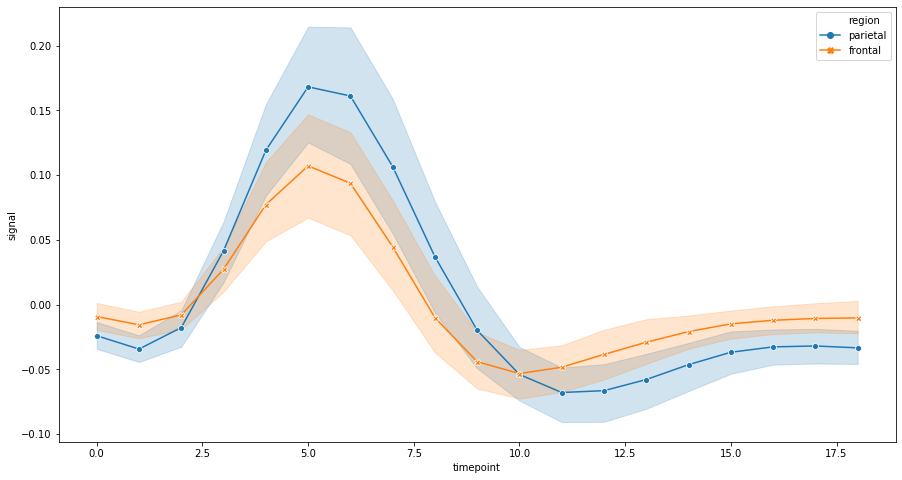

In [26]:
# 折线图
import pandas as pd
fmri = pd.read_csv('21day_data/seaborn-data/fmri.csv')
print(fmri)
#ax = sns.lineplot(x="timepoint", y="signal", data=fmri)
ax = sns.lineplot(x="timepoint", y="signal",hue="region", style="region", markers=True, dashes=False, data=fmri)


     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]


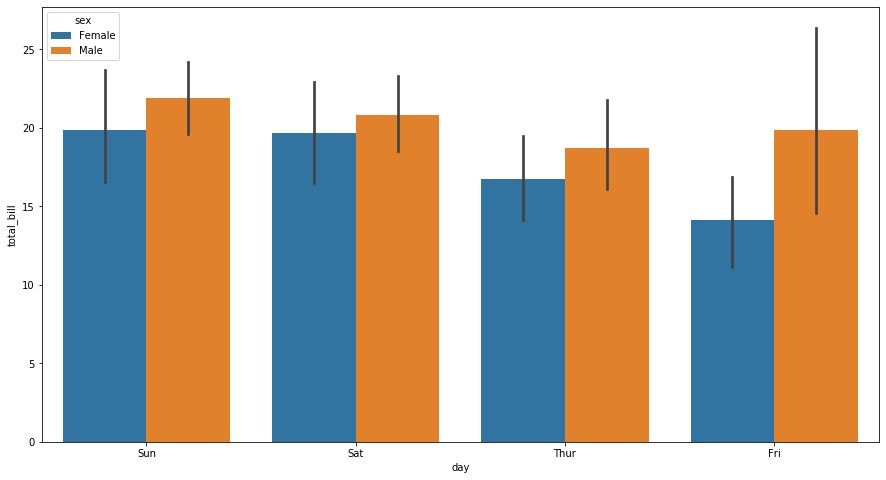

In [34]:
# 柱状图
tips = pd.read_csv('21day_data/seaborn-data/tips.csv')
df = pd.DataFrame(tips)
print(df)
ax = sns.barplot(x="day", y="total_bill", hue="sex", data=df)

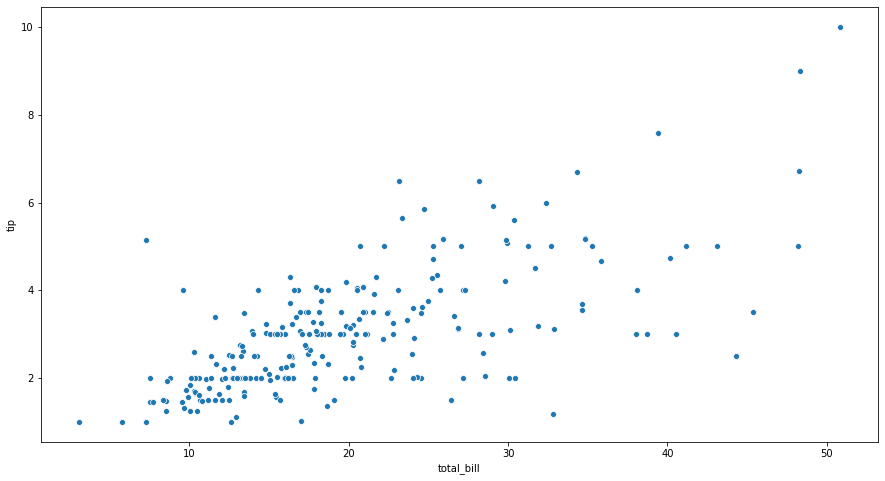

In [15]:
# 散点图
ax = sns.scatterplot(x="total_bill", y="tip", data=tips)
#ax = sns.scatterplot(x="total_bill", y="tip",hue="day", style="time",size='size',data=tips)


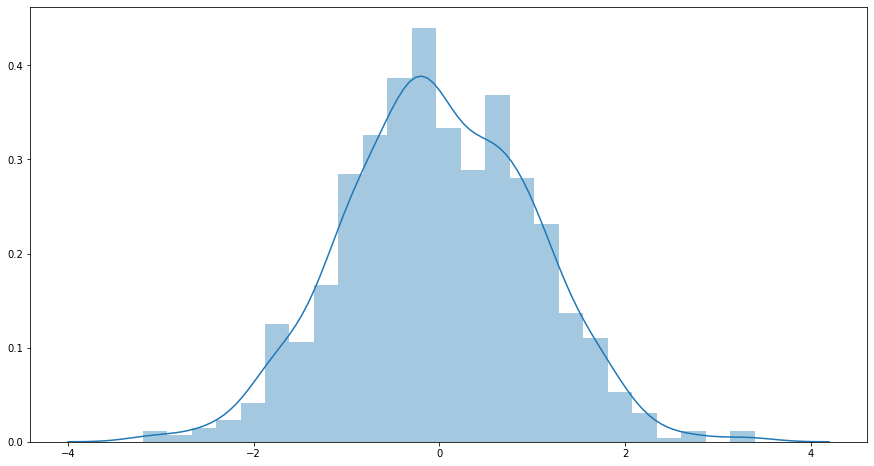

In [16]:
# 直方图
import numpy as np
np.random.seed(666)
x = np.random.randn(1000)
ax = sns.distplot(x)
#ax = sns.distplot(x, bins=100,hist=True, kde=True, rug=True, axlabel='norm')


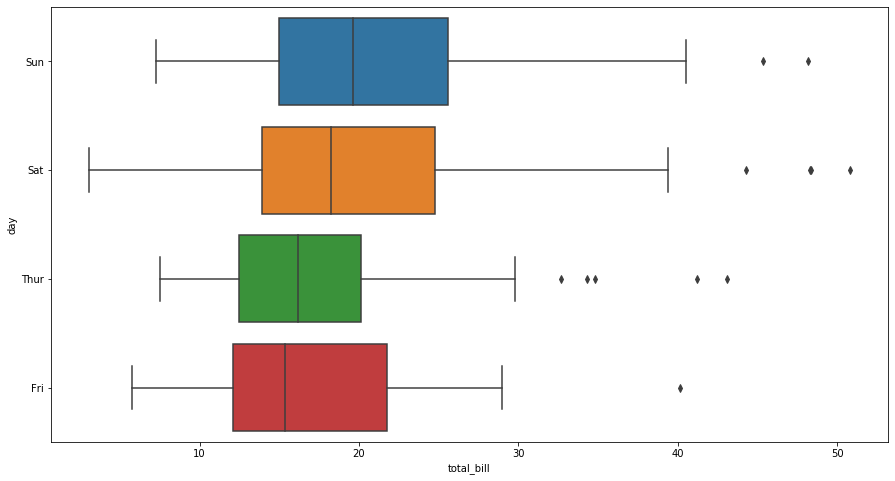

In [17]:
# 箱线图
ax = sns.boxplot(x="total_bill", y="day", orient='h', data=tips)

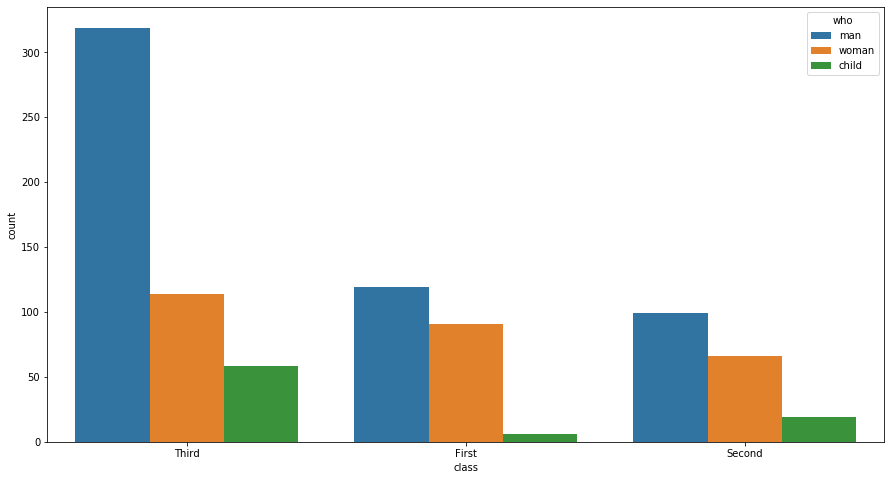

In [18]:
# 计数图
titanic = pd.read_csv('seaborn-data/titanic.csv')
ax = sns.countplot(x="class", hue="who", data=titanic)


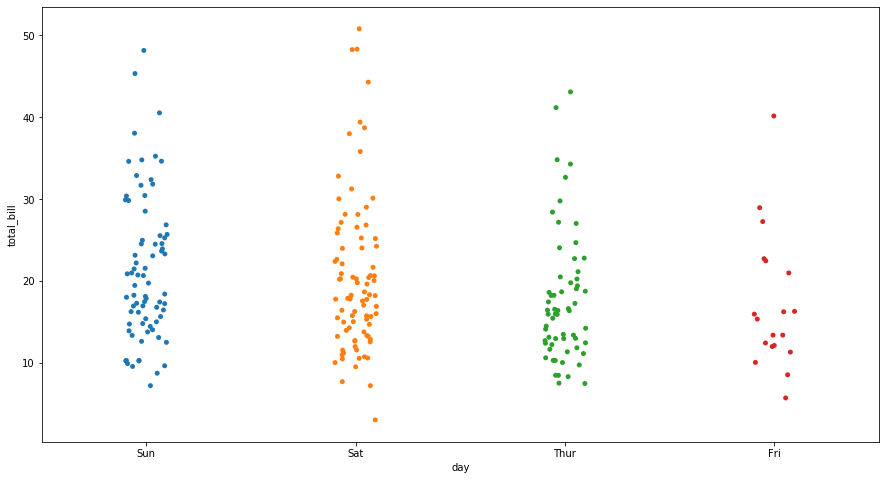

In [19]:
# 分类图
ax = sns.stripplot(x="day", y="total_bill", data=tips)
#ax = sns.stripplot(x="day", y="total_bill", hue="smoker",data=tips,dodge=True)


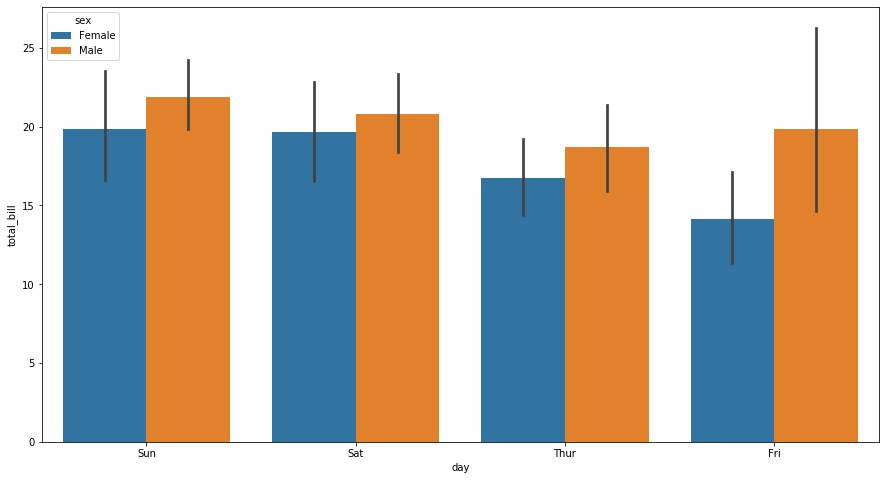

In [20]:
# 柱状图
ax = sns.barplot(x="day", y="total_bill", hue="sex", data=tips)


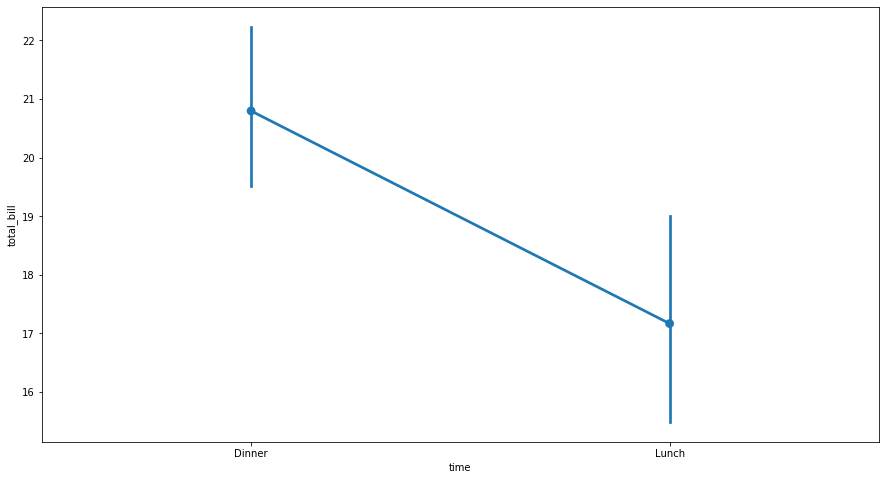

In [21]:
# 点图
ax = sns.pointplot(x="time", y="total_bill", data=tips)

#ax = sns.pointplot(x="time", y="total_bill", hue="smoker", data=tips, dodge=True)


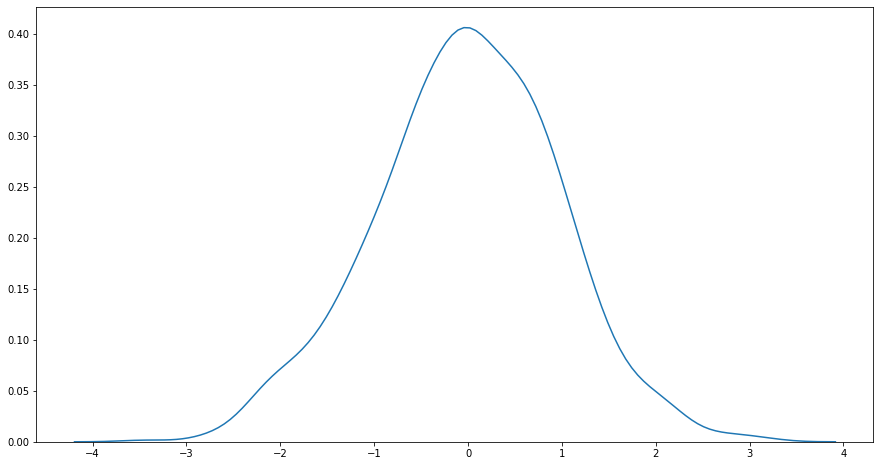

In [22]:
# 核密度估计图
x = np.random.randn(1000)
ax = sns.kdeplot(x)


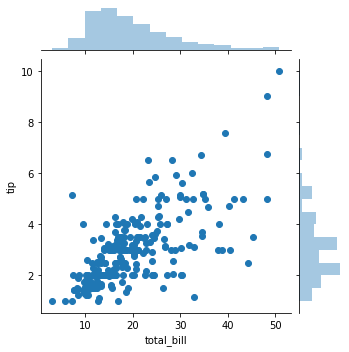

In [38]:
# 联合分布图
g = sns.jointplot(x="total_bill", y="tip", data=tips, height=5)
#g = sns.jointplot(x="total_bill", y="tip", data=tips, kind='kde', height=5)


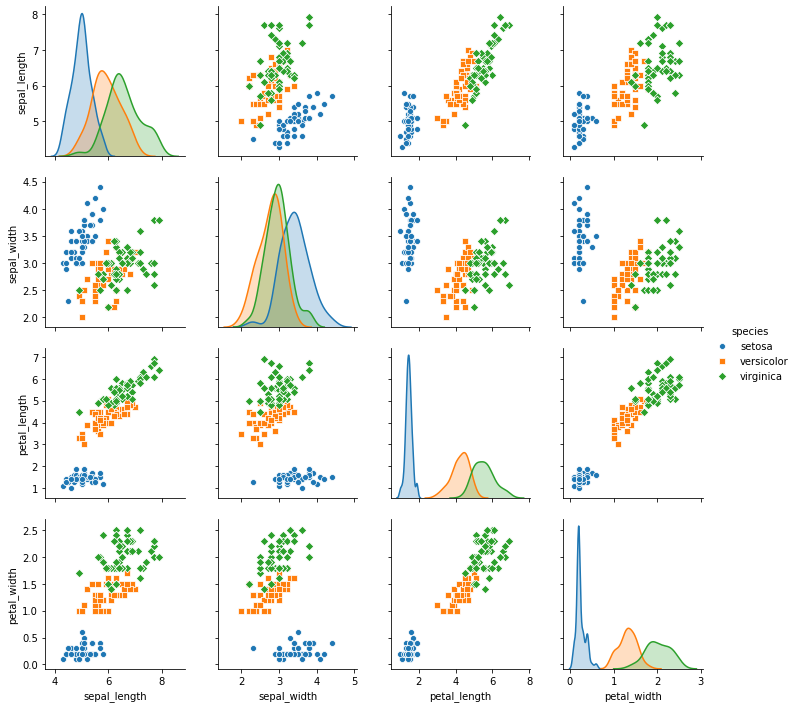

In [40]:
# 变量关系组图
iris = pd.read_csv('21day_data/seaborn-data/iris.csv')
#g = sns.pairplot(iris)

g = sns.pairplot(iris, hue="species", markers=["o", "s", "D"])


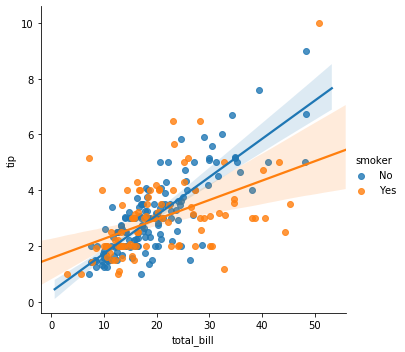

In [25]:
# 线性回归图
g = sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips)

#g = sns.lmplot(x="total_bill", y="tip", col="day", hue="day",data=tips, col_wrap=2, height=4)


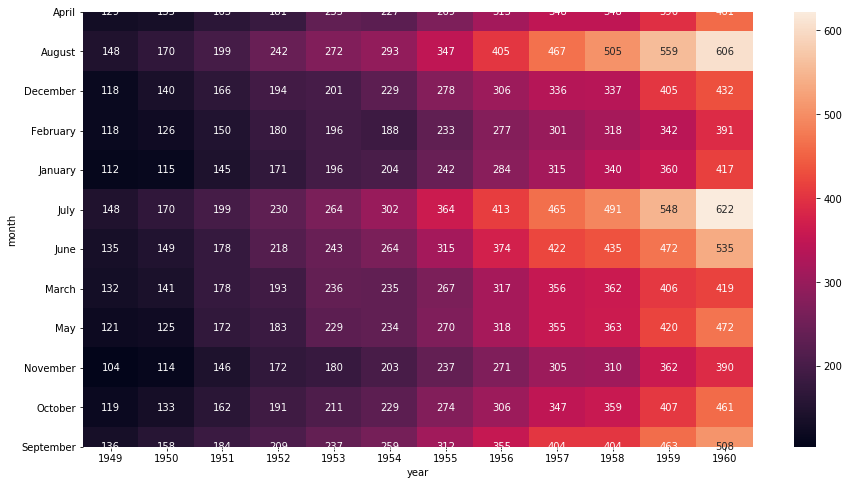

In [26]:
# 热力图
flight = pd.read_csv('seaborn-data/flights.csv')
flights = flight.pivot('month','year','passengers')
sns.heatmap(flights, annot=True, fmt='d')


# 实战项目 - 见PPT

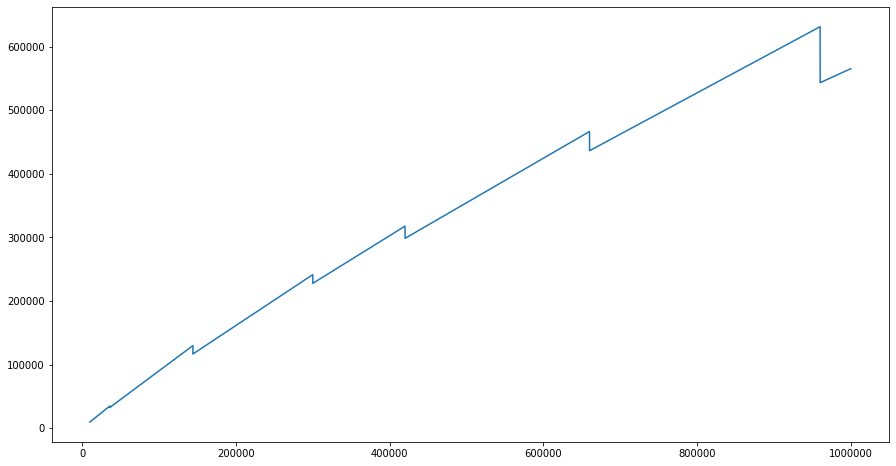

In [28]:
import numpy as np
import seaborn as sns 

# 计算年终奖个税的函数
def bonus_tax(bonus):
    if bonus <= 36000:
        return bonus * 0.03
    elif bonus <= 144000:
        return bonus * 0.1 - 210
    elif bonus <= 300000:
        return bonus * 0.2 - 1410
    elif bonus <= 420000:
        return bonus * 0.25 - 2660
    elif bonus <= 660000:
        return bonus * 0.3 - 4410
    elif bonus <= 960000:
        return bonus * 0.35 - 7160
    else:
        return bonus * 0.45 - 15160
    
bonuses = range(10000, 1000000, 100)
taxes = []
net_incomes = []
for bonus in bonuses:
    tax = bonus_tax(bonus)
    taxes.append(tax)
    net_incomes.append(bonus-tax)

sns.lineplot(x=bonuses, y=net_incomes)